<a href="https://colab.research.google.com/github/AI-DS-House-Price-Prediction/House-Price-Prediction/blob/main/AI_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.preprocessing import RobustScaler

In [4]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [5]:
def make_plot(truth, prediction):
  plt.plot(truth, color="red", label="truth")
  plt.plot(prediction, color="blue", label="predicted")
  plt.legend()
  plt.grid()
  plt.title("Comparing truth and predicted regression values")
  plt.tight_layout()
  plt.show()

In [6]:
train = pd.read_csv('drive/My Drive/AI Assignment Dataset/msc_training_dataset.csv')
test = pd.read_csv('drive/My Drive/AI Assignment Dataset/msc_testing_dataset.csv')

In [7]:
train.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,3,1,2,1,1,0,1,0,0,1,1,6835
1,5,2,2,2,1,0,0,0,0,1,1,9005
2,5,2,2,2,1,0,0,0,0,1,1,9005
3,1,2,1,2,0,0,0,0,1,1,0,5105
4,2,1,2,3,1,1,0,0,1,1,0,9105


In [8]:
test.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,1,1,1,3,0,0,1,1,0,1,0,5068
1,5,1,1,2,0,0,0,0,0,1,1,7658
2,5,1,1,3,0,0,0,1,1,1,1,11318
3,4,2,2,1,0,1,1,0,0,1,0,8858
4,5,2,1,1,0,1,1,1,0,0,1,11178


In [9]:
train.describe()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,2.990000,1.489000,1.522000,1.998333,0.490333,0.488667,0.485000,0.495667,0.512333,0.480667,0.499667,8606.600000
std,1.424281,0.499962,0.499599,0.813153,0.499990,0.499955,0.499858,0.500065,0.499931,0.499709,0.500083,2216.248563
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2235.000000
25%,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7005.000000
50%,3.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,8615.000000
75%,4.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10215.000000
max,5.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15035.000000


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   room          3000 non-null   int64
 1   bathroom      3000 non-null   int64
 2   kitchen       3000 non-null   int64
 3   french_door   3000 non-null   int64
 4   backyard      3000 non-null   int64
 5   furnished     3000 non-null   int64
 6   green_paint   3000 non-null   int64
 7   solar_power   3000 non-null   int64
 8   woodfloor     3000 non-null   int64
 9   qlm_security  3000 non-null   int64
 10  club_access   3000 non-null   int64
 11  price         3000 non-null   int64
dtypes: int64(12)
memory usage: 281.4 KB


In [11]:
test.describe()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.00000,999.000000,999.000000,999.000000,999.000000
mean,3.019019,1.491491,1.496496,1.959960,0.510511,0.474474,0.523524,0.49049,0.501502,0.500501,0.495495,8601.863864
std,1.413731,0.500178,0.500238,0.809759,0.500140,0.499598,0.499696,0.50016,0.500248,0.500250,0.500230,2217.898743
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,2688.000000
25%,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,7068.000000
50%,3.000000,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.00000,1.000000,1.000000,0.000000,8608.000000
75%,4.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,10128.000000
max,5.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,14318.000000


In [12]:
train.dtypes

room            int64
bathroom        int64
kitchen         int64
french_door     int64
backyard        int64
furnished       int64
green_paint     int64
solar_power     int64
woodfloor       int64
qlm_security    int64
club_access     int64
price           int64
dtype: object

In [13]:
train_X = train.drop('price', axis=1)
test_X = test.drop('price', axis=1)
train_Y = train['price']
test_Y = test['price']

In [14]:
# Let's build a linear regression model
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_X, train_Y)

In [15]:
reg

LinearRegression()

In [16]:
# use the linear regression model to predict
predicted = reg.predict(test_X)
predicted

array([ 5055.,  7645., 11305.,  8845., 11165., 11375., 11735.,  6835.,
        7815.,  5895.,  9095.,  8295.,  6695., 11305.,  7205.,  9165.,
        8775., 12745.,  9745.,  6655.,  9325.,  7785.,  7075.,  4315.,
        9965.,  6855.,  7335.,  8895.,  6325.,  9695.,  6645., 10305.,
       10485.,  8195.,  7565., 10355.,  9475., 11115.,  9765., 12825.,
        6295.,  5125.,  9825.,  8895., 11715.,  6205.,  4095., 11475.,
        9565.,  5535., 11455., 10395.,  4125.,  7735., 13055.,  9595.,
        6445.,  8365., 10155.,  7835.,  8275., 14305.,  7075.,  8435.,
       12625.,  7095., 11435., 10555., 10095.,  5535.,  8235., 12095.,
        4215.,  5865.,  9355.,  9245.,  7065., 11625., 10855., 10825.,
        8785.,  7355., 11865.,  8315., 11805.,  5945.,  8775.,  8275.,
        7165.,  8245.,  7575., 11925., 11965.,  7975.,  6645., 10795.,
       11235.,  8195.,  9355.,  7445.,  7235.,  8935.,  4575.,  9675.,
        5735.,  5075., 10645.,  9705.,  8605., 12515.,  8165.,  6105.,
      

In [17]:
test_copy= test.copy()
test_copy['predicted_price'] = predicted.round(2)
test_copy.head(-10)

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price,predicted_price
0,1,1,1,3,0,0,1,1,0,1,0,5068,5055.0
1,5,1,1,2,0,0,0,0,0,1,1,7658,7645.0
2,5,1,1,3,0,0,0,1,1,1,1,11318,11305.0
3,4,2,2,1,0,1,1,0,0,1,0,8858,8845.0
4,5,2,1,1,0,1,1,1,0,0,1,11178,11165.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,5,1,2,1,1,0,1,0,1,0,0,9568,9555.0
985,1,2,1,3,0,1,0,0,0,1,0,5468,5455.0
986,1,1,2,1,0,0,0,0,0,0,0,2748,2735.0
987,3,2,1,1,0,0,1,1,0,1,1,7618,7605.0


In [18]:
print(f"Regression Score: {reg.score(train_X, train_Y)}")
print(f"Mean Absolute Error: {mean_absolute_error(test_Y, predicted)}")


Regression Score: 1.0
Mean Absolute Error: 13.000000000000469


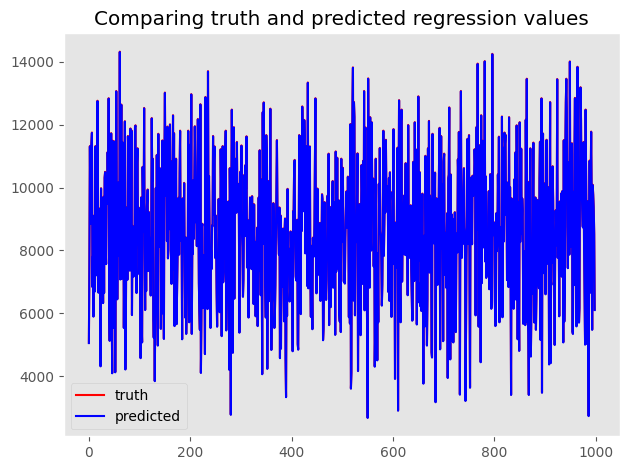

In [19]:
make_plot(test_Y, predicted)

**Feature Ranking in Linear Regression**

In [20]:
coefficients = reg.coef_

feature_importance = list(zip(train_X, coefficients))

feature_importance.sort(key=lambda x: abs(x[1]))

df_coef = pd.DataFrame(feature_importance, columns=['Features', 'Coefficients'])

print(df_coef) 

        Features  Coefficients
0    french_door         240.0
1       bathroom         300.0
2    green_paint         370.0
3   qlm_security         440.0
4        kitchen         500.0
5       backyard         560.0
6    club_access         730.0
7           room        1000.0
8    solar_power        1530.0
9      woodfloor        1890.0
10     furnished        2000.0


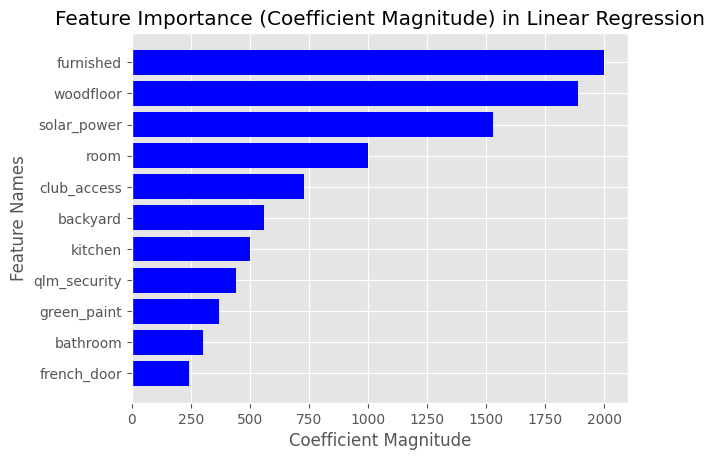

In [21]:
sorted_feature_names = [x[0] for x in feature_importance]

sorted_coefficients = [x[1] for x in feature_importance]

plt.barh(range(len(sorted_coefficients)), sorted_coefficients, color="blue")

plt.yticks(range(len(sorted_coefficients)), sorted_feature_names)

plt.xlabel('Coefficient Magnitude')

plt.ylabel('Feature Names')

plt.title('Feature Importance (Coefficient Magnitude) in Linear Regression')

plt.show()

In [22]:
# Now let's do random forest regression
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor().fit(train_X, train_Y)
rf_predicted = rf_reg.predict(test_X)
print(f"Random Forest Score: {rf_reg.score(train_X, train_Y)}")
print(f"Mean Absolute Error for RF: {mean_absolute_error(test_Y, rf_predicted)}")
print('Test MSE score:', mean_squared_error(test_Y, rf_predicted))


Random Forest Score: 0.9984190005523911
Mean Absolute Error for RF: 173.55545545545547
Test MSE score: 52345.52295295295


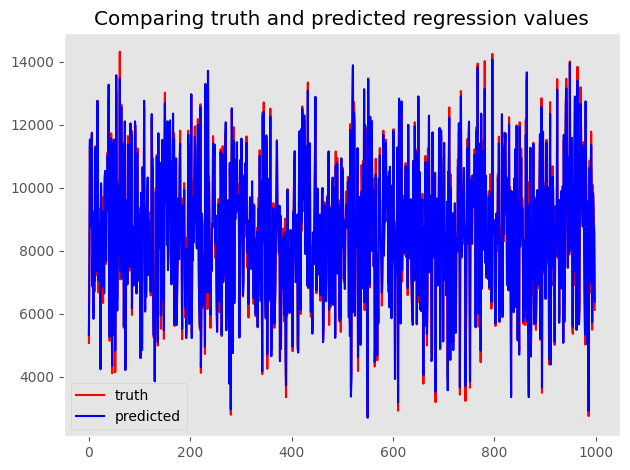

In [23]:
make_plot(test_Y, rf_predicted)

In [24]:

rf_test_copy= test.copy()
rf_test_copy['predicted_price'] = rf_predicted.round(2)
rf_test_copy

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price,predicted_price
0,1,1,1,3,0,0,1,1,0,1,0,5068,5324.8
1,5,1,1,2,0,0,0,0,0,1,1,7658,7760.4
2,5,1,1,3,0,0,0,1,1,1,1,11318,11524.8
3,4,2,2,1,0,1,1,0,0,1,0,8858,8766.6
4,5,2,1,1,0,1,1,1,0,0,1,11178,11106.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,5,2,2,3,1,1,0,0,0,0,0,10088,9834.7
995,5,1,2,3,1,1,0,0,0,0,0,9788,9775.6
996,3,2,2,1,0,1,1,1,0,1,0,9388,8834.8
997,3,2,1,1,1,0,0,1,1,0,0,8528,8615.7


**Feature Ranking in Random Forest**

In [25]:
imp_scores = zip(rf_reg.feature_importances_, train.columns)
sorted(list(imp_scores), reverse=True)

[(0.4327217175948773, 'room'),
 (0.19685076603305976, 'furnished'),
 (0.17739001212545347, 'woodfloor'),
 (0.11242154628323703, 'solar_power'),
 (0.025876098183293672, 'club_access'),
 (0.014435617812098626, 'backyard'),
 (0.010997857142482574, 'kitchen'),
 (0.00896166775806964, 'qlm_security'),
 (0.008862098460829426, 'french_door'),
 (0.006843104242020697, 'green_paint'),
 (0.004639514364577753, 'bathroom')]

In [26]:
rf_importances = rf_reg.feature_importances_
rf_reg.feature_names_in_
ranks_and_features = zip(rf_importances, rf_reg.feature_names_in_)
ranks_and_features = sorted(ranks_and_features,reverse=True)
for x, y in ranks_and_features:
    print(x, y)

0.4327217175948773 room
0.19685076603305976 furnished
0.17739001212545347 woodfloor
0.11242154628323703 solar_power
0.025876098183293672 club_access
0.014435617812098626 backyard
0.010997857142482574 kitchen
0.00896166775806964 qlm_security
0.008862098460829426 french_door
0.006843104242020697 green_paint
0.004639514364577753 bathroom


<BarContainer object of 11 artists>

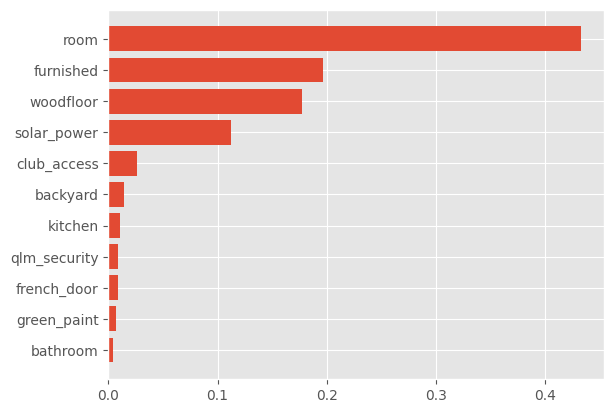

In [27]:
keys = [k[1] for k in ranks_and_features ] [::-1]
values = [k[0] for k in ranks_and_features ][::-1]
plt.barh(keys, values)

0.9471383275821861
471.3446303446304


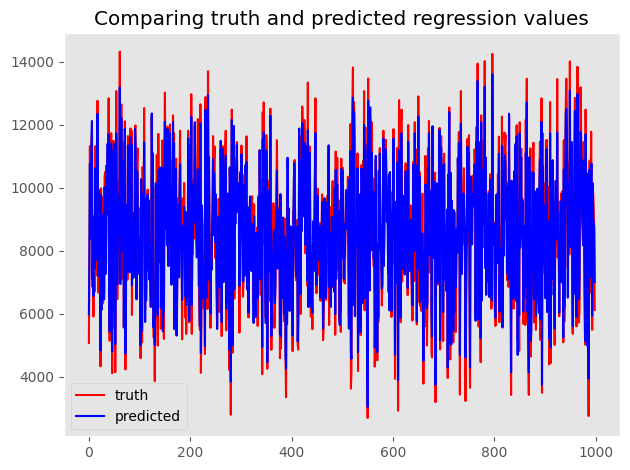

In [28]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=7)
neigh.fit(train_X, train_Y)
knn_predicted = neigh.predict(test_X)
print(neigh.score(train_X, train_Y))
print(mean_absolute_error(test_Y, knn_predicted))
make_plot(test_Y, knn_predicted)

0.9471383275821861
471.3446303446304


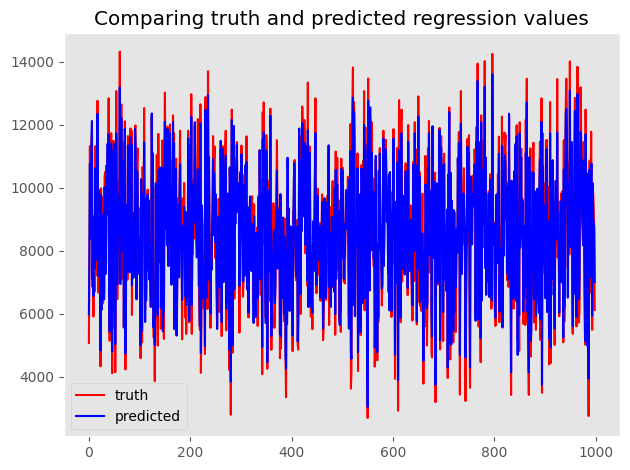

In [29]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=7)
neigh.fit(train_X, train_Y)
knn_predicted = neigh.predict(test_X)
print(neigh.score(train_X, train_Y))
print(mean_absolute_error(test_Y, knn_predicted))
make_plot(test_Y, knn_predicted)

In [30]:
import xgboost as xgb
xgb_reg =  xgb.XGBRegressor().fit(train_X, train_Y)
xgb_predicted = xgb_reg.predict(test_X)
print("R-sqaured:", xgb_reg.score(train_X, train_Y))
print("Mean Absolute Error:", mean_absolute_error(test_Y, xgb_predicted))
xgb_importances = xgb_reg.feature_importances_
xgb_ranks_and_features = zip(xgb_importances, rf_reg.feature_names_in_)
xgb_ranks_and_features = sorted(xgb_ranks_and_features,reverse=True)
print("\nFeature Importances with XGBoost:")
for x, y in xgb_ranks_and_features:
    print(x, y)

R-sqaured: 0.9997084329328167
Mean Absolute Error: 60.142959121230604

Feature Importances with XGBoost:
0.29977584 room
0.241706 woodfloor
0.2364698 furnished
0.11214046 solar_power
0.026595302 club_access
0.019723801 backyard
0.01696462 qlm_security
0.014970071 kitchen
0.011910282 french_door
0.011131189 green_paint
0.0086126365 bathroom


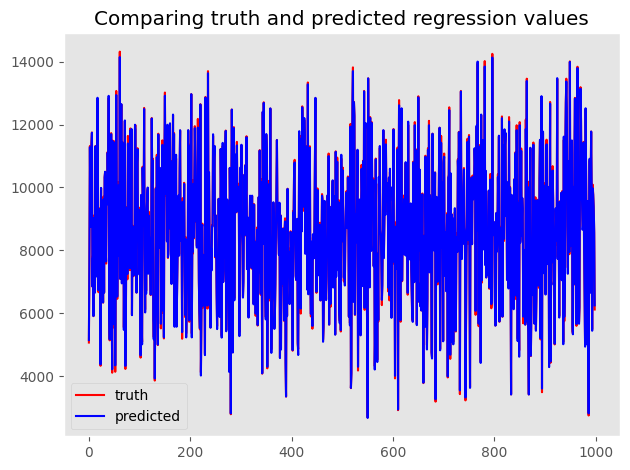

In [31]:
make_plot(test_Y, xgb_predicted)

**Feature Importances with XGBoost**

<BarContainer object of 11 artists>

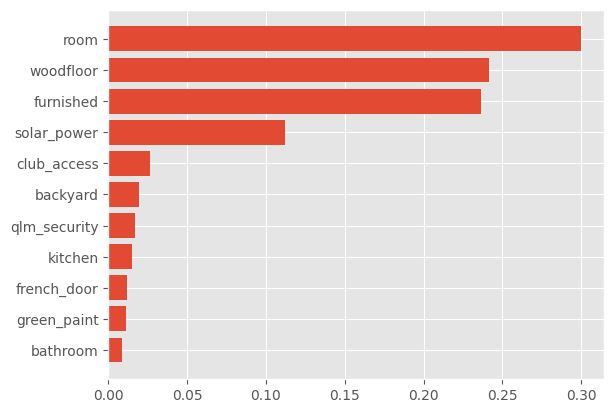

In [32]:
keys = [k[1] for k in xgb_ranks_and_features ] [::-1]
values = [k[0] for k in xgb_ranks_and_features ][::-1]
plt.barh(keys, values)

In [33]:
xgb_test_copy= test.copy()
xgb_test_copy['predicted_price'] = xgb_predicted.round(2)
xgb_test_copy

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price,predicted_price
0,1,1,1,3,0,0,1,1,0,1,0,5068,5148.419922
1,5,1,1,2,0,0,0,0,0,1,1,7658,7656.700195
2,5,1,1,3,0,0,0,1,1,1,1,11318,11278.059570
3,4,2,2,1,0,1,1,0,0,1,0,8858,8745.120117
4,5,2,1,1,0,1,1,1,0,0,1,11178,11127.099609
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,5,2,2,3,1,1,0,0,0,0,0,10088,9970.370117
995,5,1,2,3,1,1,0,0,0,0,0,9788,9773.120117
996,3,2,2,1,0,1,1,1,0,1,0,9388,9389.589844
997,3,2,1,1,1,0,0,1,1,0,0,8528,8573.990234


**SVM Regression with hyperparameter tuning - Grid Search**

In [34]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(train_X)
X_test_scaled = scaler.transform(test_X)

**Create an SVM classifier and Hyperparameter grid to search**

In [35]:
SVR_model = svm.SVR()
hyperparameters = {'kernel': ['linear'],
                   'C': [0.1, 1, 10],
                   'gamma': [0.1, 1, 10],
                   'epsilon': [0.1, 0.2, 0.5]
                   }

In [36]:
grid_search = GridSearchCV(SVR_model, hyperparameters, cv=5)
grid_search.fit(X_train_scaled, train_Y)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'epsilon': [0.1, 0.2, 0.5],
                         'gamma': [0.1, 1, 10], 'kernel': ['linear']})

In [37]:
best_svmreg = grid_search.best_estimator_
print(best_svmreg,'\n')
svm_predicted = best_svmreg.predict(X_test_scaled)

SVR(C=10, gamma=0.1, kernel='linear') 



**Display R2, MSE and MAE**

In [38]:
print("MSE: %.2f" % mean_squared_error(test_Y, svm_predicted))
print("R2 score: %.2f" % r2_score(test_Y, svm_predicted))
print("MAE score ", mean_absolute_error(test_Y, svm_predicted))

MSE: 168.88
R2 score: 1.00
MAE score  12.995071295840912


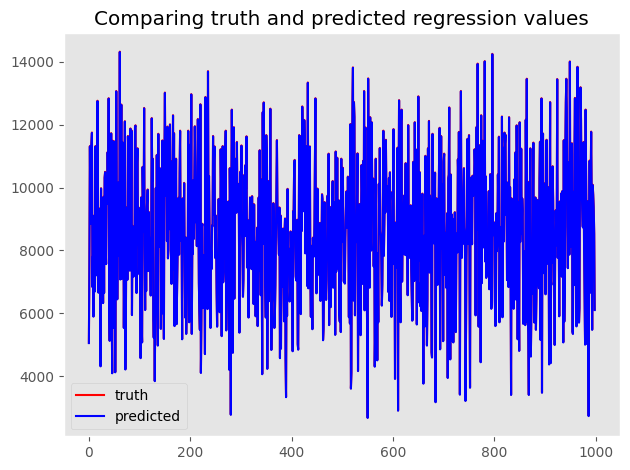

In [39]:
make_plot(test_Y, svm_predicted)

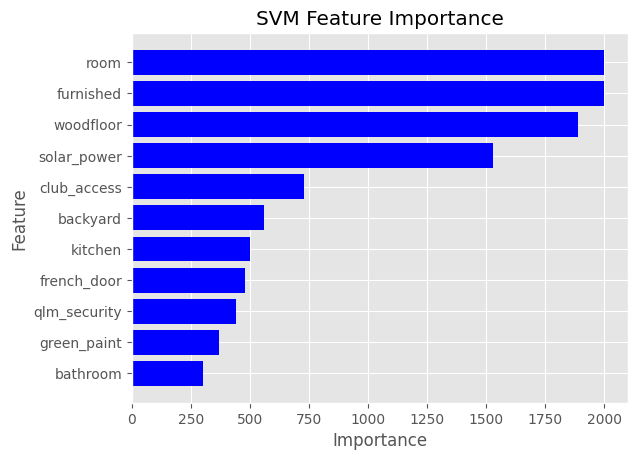

In [40]:
# Create a dictionary of feature names and their corresponding importances
svm_importances = abs(best_svmreg.coef_[0])

feature_importances = {feature_name: importance for feature_name, importance in zip(train_X.columns, svm_importances)}

# Sort the feature importances in descending order
sorted_importances = sorted(feature_importances.items(), key=lambda x: x[1], reverse=False)

# Extract the feature names and importances for plotting
features, importances = zip(*sorted_importances)

# Plot a bar chart of the feature importances
plt.barh(features, importances, color="blue")
plt.xticks(rotation=0)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.title("SVM Feature Importance")
plt.show()

In [41]:
feature_importances

{'room': 1999.9992582683483,
 'bathroom': 299.9998201818706,
 'kitchen': 499.9996697852513,
 'french_door': 479.99944104014224,
 'backyard': 559.9996942632688,
 'furnished': 1999.803096330683,
 'green_paint': 369.99959654356627,
 'solar_power': 1529.9985881184223,
 'woodfloor': 1889.9981698235547,
 'qlm_security': 439.9995503191783,
 'club_access': 729.9995890736037}

In [42]:
svm_test_copy= test.copy()
svm_test_copy['predicted_price'] = svm_predicted.round(2)
svm_test_copy

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price,predicted_price
0,1,1,1,3,0,0,1,1,0,1,0,5068,5055.1
1,5,1,1,2,0,0,0,0,0,1,1,7658,7645.1
2,5,1,1,3,0,0,0,1,1,1,1,11318,11305.1
3,4,2,2,1,0,1,1,0,0,1,0,8858,8844.9
4,5,2,1,1,0,1,1,1,0,0,1,11178,11164.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,5,2,2,3,1,1,0,0,0,0,0,10088,10074.9
995,5,1,2,3,1,1,0,0,0,0,0,9788,9774.9
996,3,2,2,1,0,1,1,1,0,1,0,9388,9374.9
997,3,2,1,1,1,0,0,1,1,0,0,8528,8515.1


Text(0.5, 1.0, 'MAE for various regression algorithms')

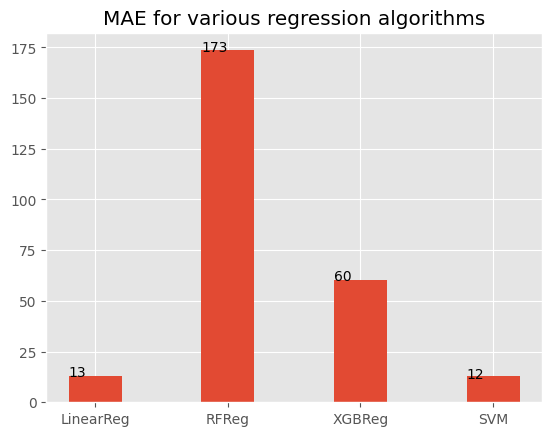

In [43]:
# Let's plot the mean absolute error of all the algorithms we have tried
lin_mae = mean_absolute_error(test_Y, predicted)
rf_mae = mean_absolute_error(test_Y, rf_predicted)
xgb_mae = mean_absolute_error(test_Y, xgb_predicted)
svm_mae = mean_absolute_error(test_Y, svm_predicted)
errors = [lin_mae, rf_mae, xgb_mae,svm_mae]
labels = ["LinearReg", "RFReg", "XGBReg", "SVM"]
bars = plt.bar(labels, errors, width=0.4)
for bar in bars:
    yval = int(bar.get_height())
    plt.text(bar.get_x(), yval + .005, yval)
#plt.grid()
plt.title("MAE for various regression algorithms")

In [44]:
errors

[13.000000000000469,
 173.55545545545547,
 60.142959121230604,
 12.995071295840912]

In [45]:
xgb_predicted_a = [round(float(item), 1) for item in xgb_predicted]

In [46]:
price_comp = pd.DataFrame({'actual_test_price': test['price'], 'lreg_predicted_price': predicted.round(2), 'rf_predicted_price':rf_predicted.round(2), 'xgb_predicted_price':xgb_predicted_a, 'svm_predicted_price':svm_predicted.round(2)})

price_comp

,actual_test_price,lreg_predicted_price,rf_predicted_price,xgb_predicted_price,svm_predicted_price
0,5068,5055.0,5324.8,5148.4,5055.1
1,7658,7645.0,7760.4,7656.7,7645.1
2,11318,11305.0,11524.8,11278.1,11305.1
3,8858,8845.0,8766.6,8745.1,8844.9
4,11178,11165.0,11106.2,11127.1,11164.9
...,...,...,...,...,...
994,10088,10075.0,9834.7,9970.4,10074.9
995,9788,9775.0,9775.6,9773.1,9774.9
996,9388,9375.0,8834.8,9389.6,9374.9
997,8528,8515.0,8615.7,8574.0,8515.1


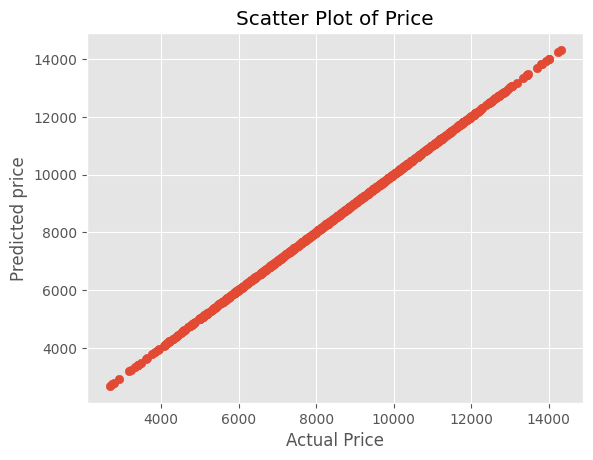

In [47]:
plt.scatter(test_copy['predicted_price'], test['price'])
plt.title('Scatter Plot of Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted price')
plt.show()